# Projet

Le projet consiste à prévoir le nombre de vélos loués à chaque heure dans des bornes libres-services de la ville (système type Vélib'). La variable cible est ici la variable **count**.

Voici un descriptif de l'ensemble des variables :
* *datetime* - date et heure du relevé 
* *season* - 1 = printemps , 2 = été, 3 = automne, 4 = hiver 
* *holiday* – indique si le jour est un jour de vacances scolaires 
* *workingday* - indique si le jour est travaillé (ni week-end ni vacances) 
* *weather* - 1: Dégagé à nuageux, 2 : Brouillard, 3 : Légère pluie ou neige, 4 : Fortes averses ou neiges 
* *temp* – température en degrés Celsius 
* *atemp* – température ressentie en degrés Celsius 
* *humidity* – taux d’humidité 
* *windspeed* – vitesse du vent 
* *casual* - nombre de locations d’usagers non abonnés 
* *registered* – nombre de locations d’usagers abonnés 
* *count* – nombre total de locations de vélos 

L'objectif du projet est de mener à bien la création d'un modèle qui pourrait théoriquement être déployé en production. Les étapes d'exploration des données, de traitement et de preprocessing ne sont bien entendu pas à négliger. Il ne s'agit pas d'une compétition de type *Kaggle*, le projet ne sera pas uniquement noté sur la performance du modèle, mais plutôt sur votre approche complète et la justification de chacun de vos choix.

Comme vu durant le cours, soyez faites attention à certains points :
- quel type de problème dois-je traiter ?
- feature engineering : est-ce que j'utilise les données correctement, toutes les données ?
- data leakage : est-ce qu'une de mes features n'est pas trop explicative ?
- ai-je bien traité toutes les données correctement ?
- est-ce que mon modèle est adapté ?
- etc, etc, etc

Soyez vigilant à expliquer et justifier votre démarche à l'aide de visualisation, de commentaires dans vos codes (pensez aux cellules markdown), etc

In [1]:
import pandas as pd
import numpy as np
import math  

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("../data/input/velo.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


On va d'abord verifier s'il y a pas des valeurs nulles

In [3]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


datetime est déclaré comme object, on doit le convertir en datetime.

In [5]:
df.datetime=pd.to_datetime(df.datetime)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


Et maintenant, on sépare le datetime en année, mois, jour, heure et le jour de la semaine

In [7]:
df["year"]=df['datetime'].dt.year
df["month"]=df['datetime'].dt.month
df["day"]=df['datetime'].dt.day
df["hour"]=df['datetime'].dt.hour
df["dayofweek"]=df['datetime'].dt.day_name()
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday


Notre colonne "dayofweek" doit être changer de données catégorielles en données numériques.

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["dayofweek"]=le.fit_transform(df["dayofweek"])

Maintenant on a plus besoin de la colonne "datetime"

In [9]:
df=df.drop("datetime",axis=1)

On peut remarquer maintenant que notre table ne contient que des valeurs numériques.

In [10]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,2
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,2
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,2
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,2


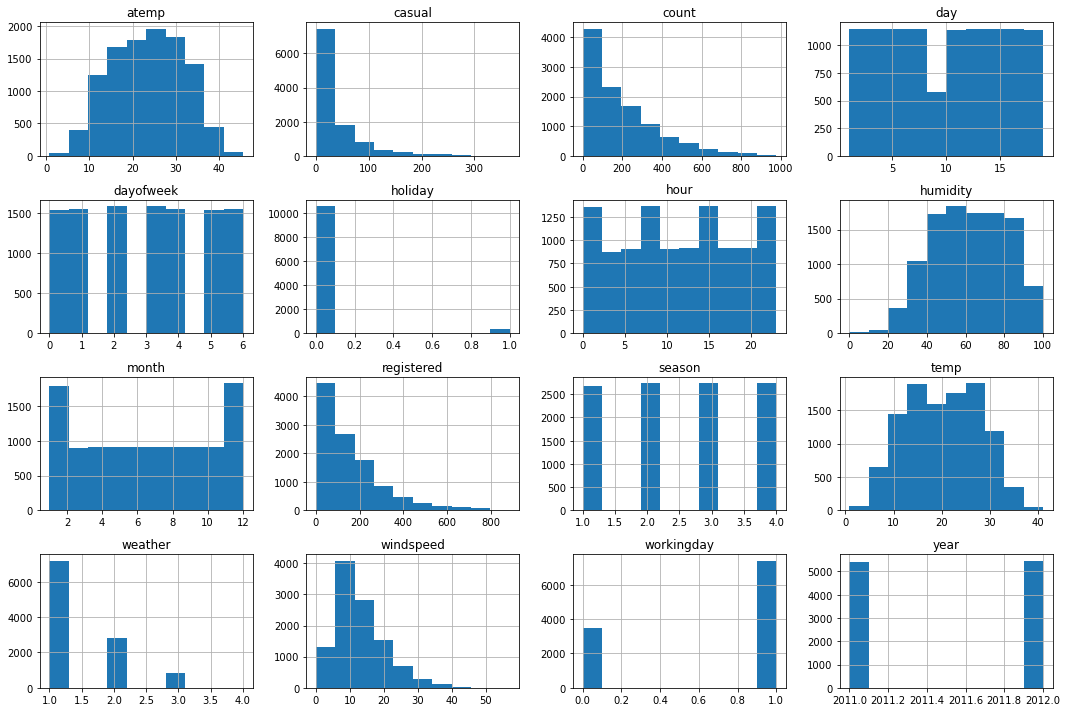

In [11]:
df.hist(figsize = (15,10))
plt.tight_layout()
plt.show()

On peut dopper les colonnes 'dayofweek', 'year', 'season' vue que la demande reste la même tout au long de ces derniers. D'une autre part Holiday, est en générale dominée par des 0 et la valeur 1 ne produira aucun changement, on peut alors dropper cette colonne aussi.

## Analyse multivariée


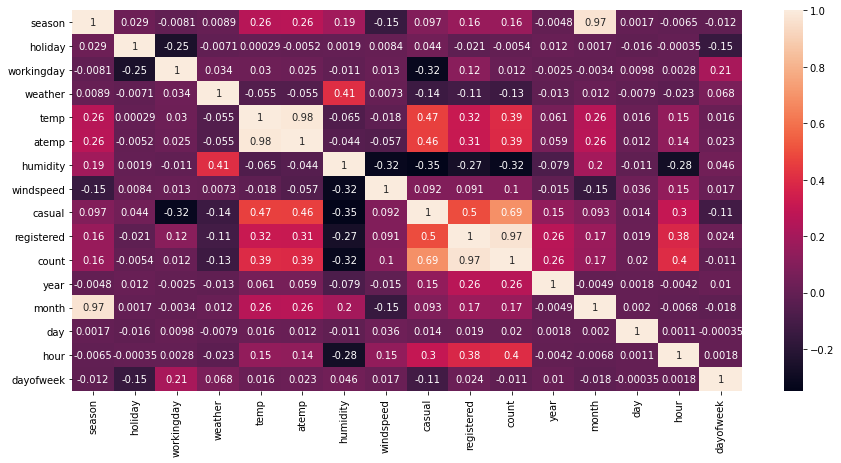

In [12]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

Notre cible est 'count', à partir de la description des variables, est la somme des deux variables 'registred' et 'casual' ceci est bien évident à partir de la figure de correlation. On cherche à prédire 'count' donc on va dropper 'registred' et 'casual'.
On peut remarquer aussi que temp et atemp ont une forte correlation. Une des deux variables suffit. Donc on droppera aussi atemp.

In [13]:
df=df.drop(columns=['dayofweek','year','season','holiday','registered','casual','atemp'],axis=1)

In [14]:
df.head()

,workingday,weather,temp,humidity,windspeed,count,month,day,hour
0,0,1,9.84,81,0.0,16,1,1,0
1,0,1,9.02,80,0.0,40,1,1,1
2,0,1,9.02,80,0.0,32,1,1,2
3,0,1,9.84,75,0.0,13,1,1,3
4,0,1,9.84,75,0.0,1,1,1,4


# Outliers

In [15]:
df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [16]:
df['count'].quantile([0.05,0.1,0.15,0.9,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    452.00
0.99    774.15
Name: count, dtype: float64

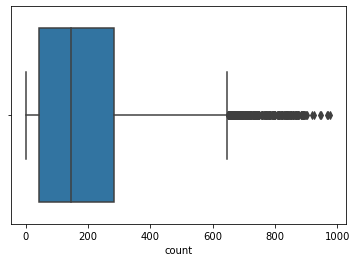

In [17]:
sns.boxplot(x="count", data=df)
plt.show()

On peut dire de la figure et des stats, que 50% des valeurs sont entre 42 et 284. 1% (outliers qu'on peut voir du boxplot) des valeurs dépassent 774.15, ce qui n'est pas un très grand pourcentage. Du coup, pas la peine de dropper les outliers.

# Transformer en distribution normale

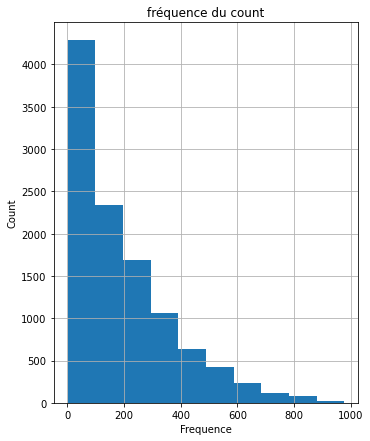

In [18]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1,)
plt.title('fréquence du count')
plt.xlabel('Frequence')
plt.ylabel('Count')
df["count"].hist()

A partir du graphe, on peut voir que notre cible n'est pas normalement distribué du coup:

In [19]:
df['count'] = np.log(df['count'])

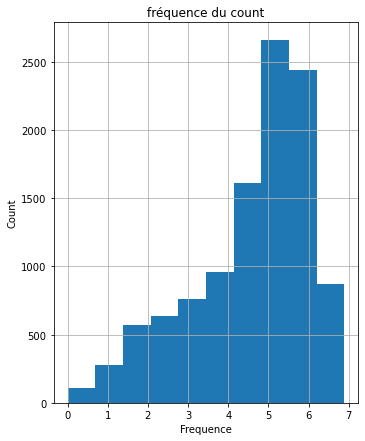

In [20]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1,)
plt.title('fréquence du count')
plt.xlabel('Frequence')
plt.ylabel('Count')
df["count"].hist()

# Données Catégorielles

Avant d'entamer la partie entrainement, on va d'abbord traiter nos données catégorielles.

In [21]:
df["workingday"] = pd.Categorical(df["workingday"], ordered=False)
df["weather"] = pd.Categorical(df["weather"], ordered=False)
df["month"] = pd.Categorical(df["month"], ordered=False)
df["day"] = pd.Categorical(df["day"], ordered=False)
df["hour"] = pd.Categorical(df["hour"], ordered=False)

In [22]:
categorical_features=['workingday','weather','month','day','hour']

In [23]:
df_dummies = pd.get_dummies(df[categorical_features])

In [24]:
df_dummies

,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4,month_1,month_2,month_3,month_4,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10882,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10883,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10884,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
# on concatène ensuite avec le dataset original
df = pd.concat([df.drop(categorical_features, axis=1), df_dummies], axis=1)
df.head()

,temp,humidity,windspeed,count,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,81,0.0,2.772589,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.02,80,0.0,3.688879,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.02,80,0.0,3.465736,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.84,75,0.0,2.564949,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.84,75,0.0,0.000000,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Enfin, il nous faut séparer les variables explicatives (*features*) de la variable cible (*target*).

In [26]:
X = df.drop(["count"], axis=1)
y = df["count"]

# Train, Test


#### Regression multilinéaire

In [27]:
from sklearn.linear_model import LinearRegression 
LR=LinearRegression()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=0)

Entrainement du modèle

In [29]:
LR.fit(X_train,y_train)

LinearRegression()

In [30]:
y_predict = LR.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
def model_eval(a,b):
    msle = mean_squared_log_error(a,b)
    mse=mean_squared_error(a,b)
    rmse=math.sqrt(mse)
    rmsle = math.sqrt(msle)
    print('MSE of the model:',mse)
    print('MSLE of the model:',msle)
    print('RMSE of the model:',rmse)
    print('RMSLE of the model:',rmsle)

In [32]:
model_eval(y_test,y_predict)

MSE of the model: 0.4625093580912792
MSLE of the model: 0.03392636436971745
RMSE of the model: 0.6800804056075128
RMSLE of the model: 0.18419110828082189


Le modèle de regression lineaire est assez bon, puisqu'on a une valeur de RMSE faible. 

#### Ridge

In [33]:
from sklearn.linear_model import Ridge
RM=Ridge()

In [34]:
RM.fit(X_train,y_train)

Ridge()

In [35]:
y_predict2=RM.predict(X_test)

In [36]:
model_eval(y_test,y_predict2)

MSE of the model: 0.4623895716257504
MSLE of the model: 0.033968488331157246
RMSE of the model: 0.679992332034524
RMSLE of the model: 0.1843054213287207


Le modèle de regression Ridge est assez bon, puisqu'on a une valeur de RMSE faible. 

#### Lasso

In [37]:
from sklearn.linear_model import Lasso
LM=Lasso()

In [38]:
LM.fit(X_train,y_train)

Lasso()

In [39]:
y_predict3=LM.predict(X_test)

In [40]:
model_eval(y_test,y_predict3)

MSE of the model: 1.7144947941371576
MSLE of the model: 0.10856246222693644
RMSE of the model: 1.3093871826687313
RMSLE of the model: 0.32948818222652


#### Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=500)

In [42]:
RF.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500)

In [43]:
y_predict4=RF.predict(X_test)

In [44]:
model_eval(y_test,y_predict4)

MSE of the model: 0.20747579806781544
MSLE of the model: 0.019491172837063937
RMSE of the model: 0.45549511311079444
RMSLE of the model: 0.13961079054666203


#### CONCLUSION :
Le top des modèles est Random Forest qui donnent la valeurs la plus faible de RMSE. Vient juste après les 2 modèles, Regression Lineaire et Ridge ont presque les mêmes valeures de RMSE qui est assez faible, et qui performent assez bien aussi.
Alors que Lasso regression performent plutôt mal.